In [1]:
# Import required libraries and set display configurations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for high-resolution plots in Jupyter
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.unicode_minus'] = False

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Generate synthetic datasets for hypothesis testing
# Single population data
n1 = 100
mu1_true = 50
sigma1_true = 10
single_pop_data = np.random.normal(loc=mu1_true, scale=sigma1_true, size=n1)

# Two population data
n2 = 80
mu2_true = 52
sigma2_true = 12
pop1_data = np.random.normal(loc=mu1_true, scale=sigma1_true, size=n1)
pop2_data = np.random.normal(loc=mu2_true, scale=sigma2_true, size=n2)

# Create DataFrames
single_df = pd.DataFrame({'value': single_pop_data, 'population': 'Single'})
two_pop_df = pd.DataFrame({
    'value': np.concatenate([pop1_data, pop2_data]),
    'population': ['Population 1'] * len(pop1_data) + ['Population 2'] * len(pop2_data)
})

# Display basic information about the datasets
print("Single Population Dataset:")
print(f"Sample size: {len(single_pop_data)}")
print(f"Sample mean: {single_pop_data.mean():.4f}")
print(f"Sample std: {single_pop_data.std():.4f}")
print(f"True mean: {mu1_true}, True std: {sigma1_true}")

print("\nTwo Population Dataset:")
print(f"Population 1 size: {len(pop1_data)}, mean: {pop1_data.mean():.4f}, std: {pop1_data.std():.4f}")
print(f"Population 2 size: {len(pop2_data)}, mean: {pop2_data.mean():.4f}, std: {pop2_data.std():.4f}")
print(f"True means: {mu1_true}, {mu2_true}; True stds: {sigma1_true}, {sigma2_true}")

Single Population Dataset:
Sample size: 100
Sample mean: 48.9615
Sample std: 9.0362
True mean: 50, True std: 10

Two Population Dataset:
Population 1 size: 100, mean: 50.2230, std: 9.4889
Population 2 size: 80, mean: 52.4826, std: 13.3535
True means: 50, 52; True stds: 10, 12


In [3]:
# Data preprocessing and exploratory analysis
def calculate_summary_stats(data, label):
    """
    Calculate summary statistics for a dataset
    """
    stats_dict = {
        'mean': np.mean(data),
        'std': np.std(data, ddof=1),  # Sample std (ddof=1)
        'var': np.var(data, ddof=1),  # Sample variance (ddof=1)
        'n': len(data),
        'se': np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    }
    print(f"\n{label} Summary Statistics:")
    for key, value in stats_dict.items():
        print(f"{key}: {value:.4f}")
    return stats_dict

single_stats = calculate_summary_stats(single_pop_data, "Single Population")
pop1_stats = calculate_summary_stats(pop1_data, "Population 1")
pop2_stats = calculate_summary_stats(pop2_data, "Population 2")


Single Population Summary Statistics:
mean: 48.9615
std: 9.0817
var: 82.4770
n: 100.0000
se: 0.9082

Population 1 Summary Statistics:
mean: 50.2230
std: 9.5367
var: 90.9484
n: 100.0000
se: 0.9537

Population 2 Summary Statistics:
mean: 52.4826
std: 13.4377
var: 180.5719
n: 80.0000
se: 1.5024


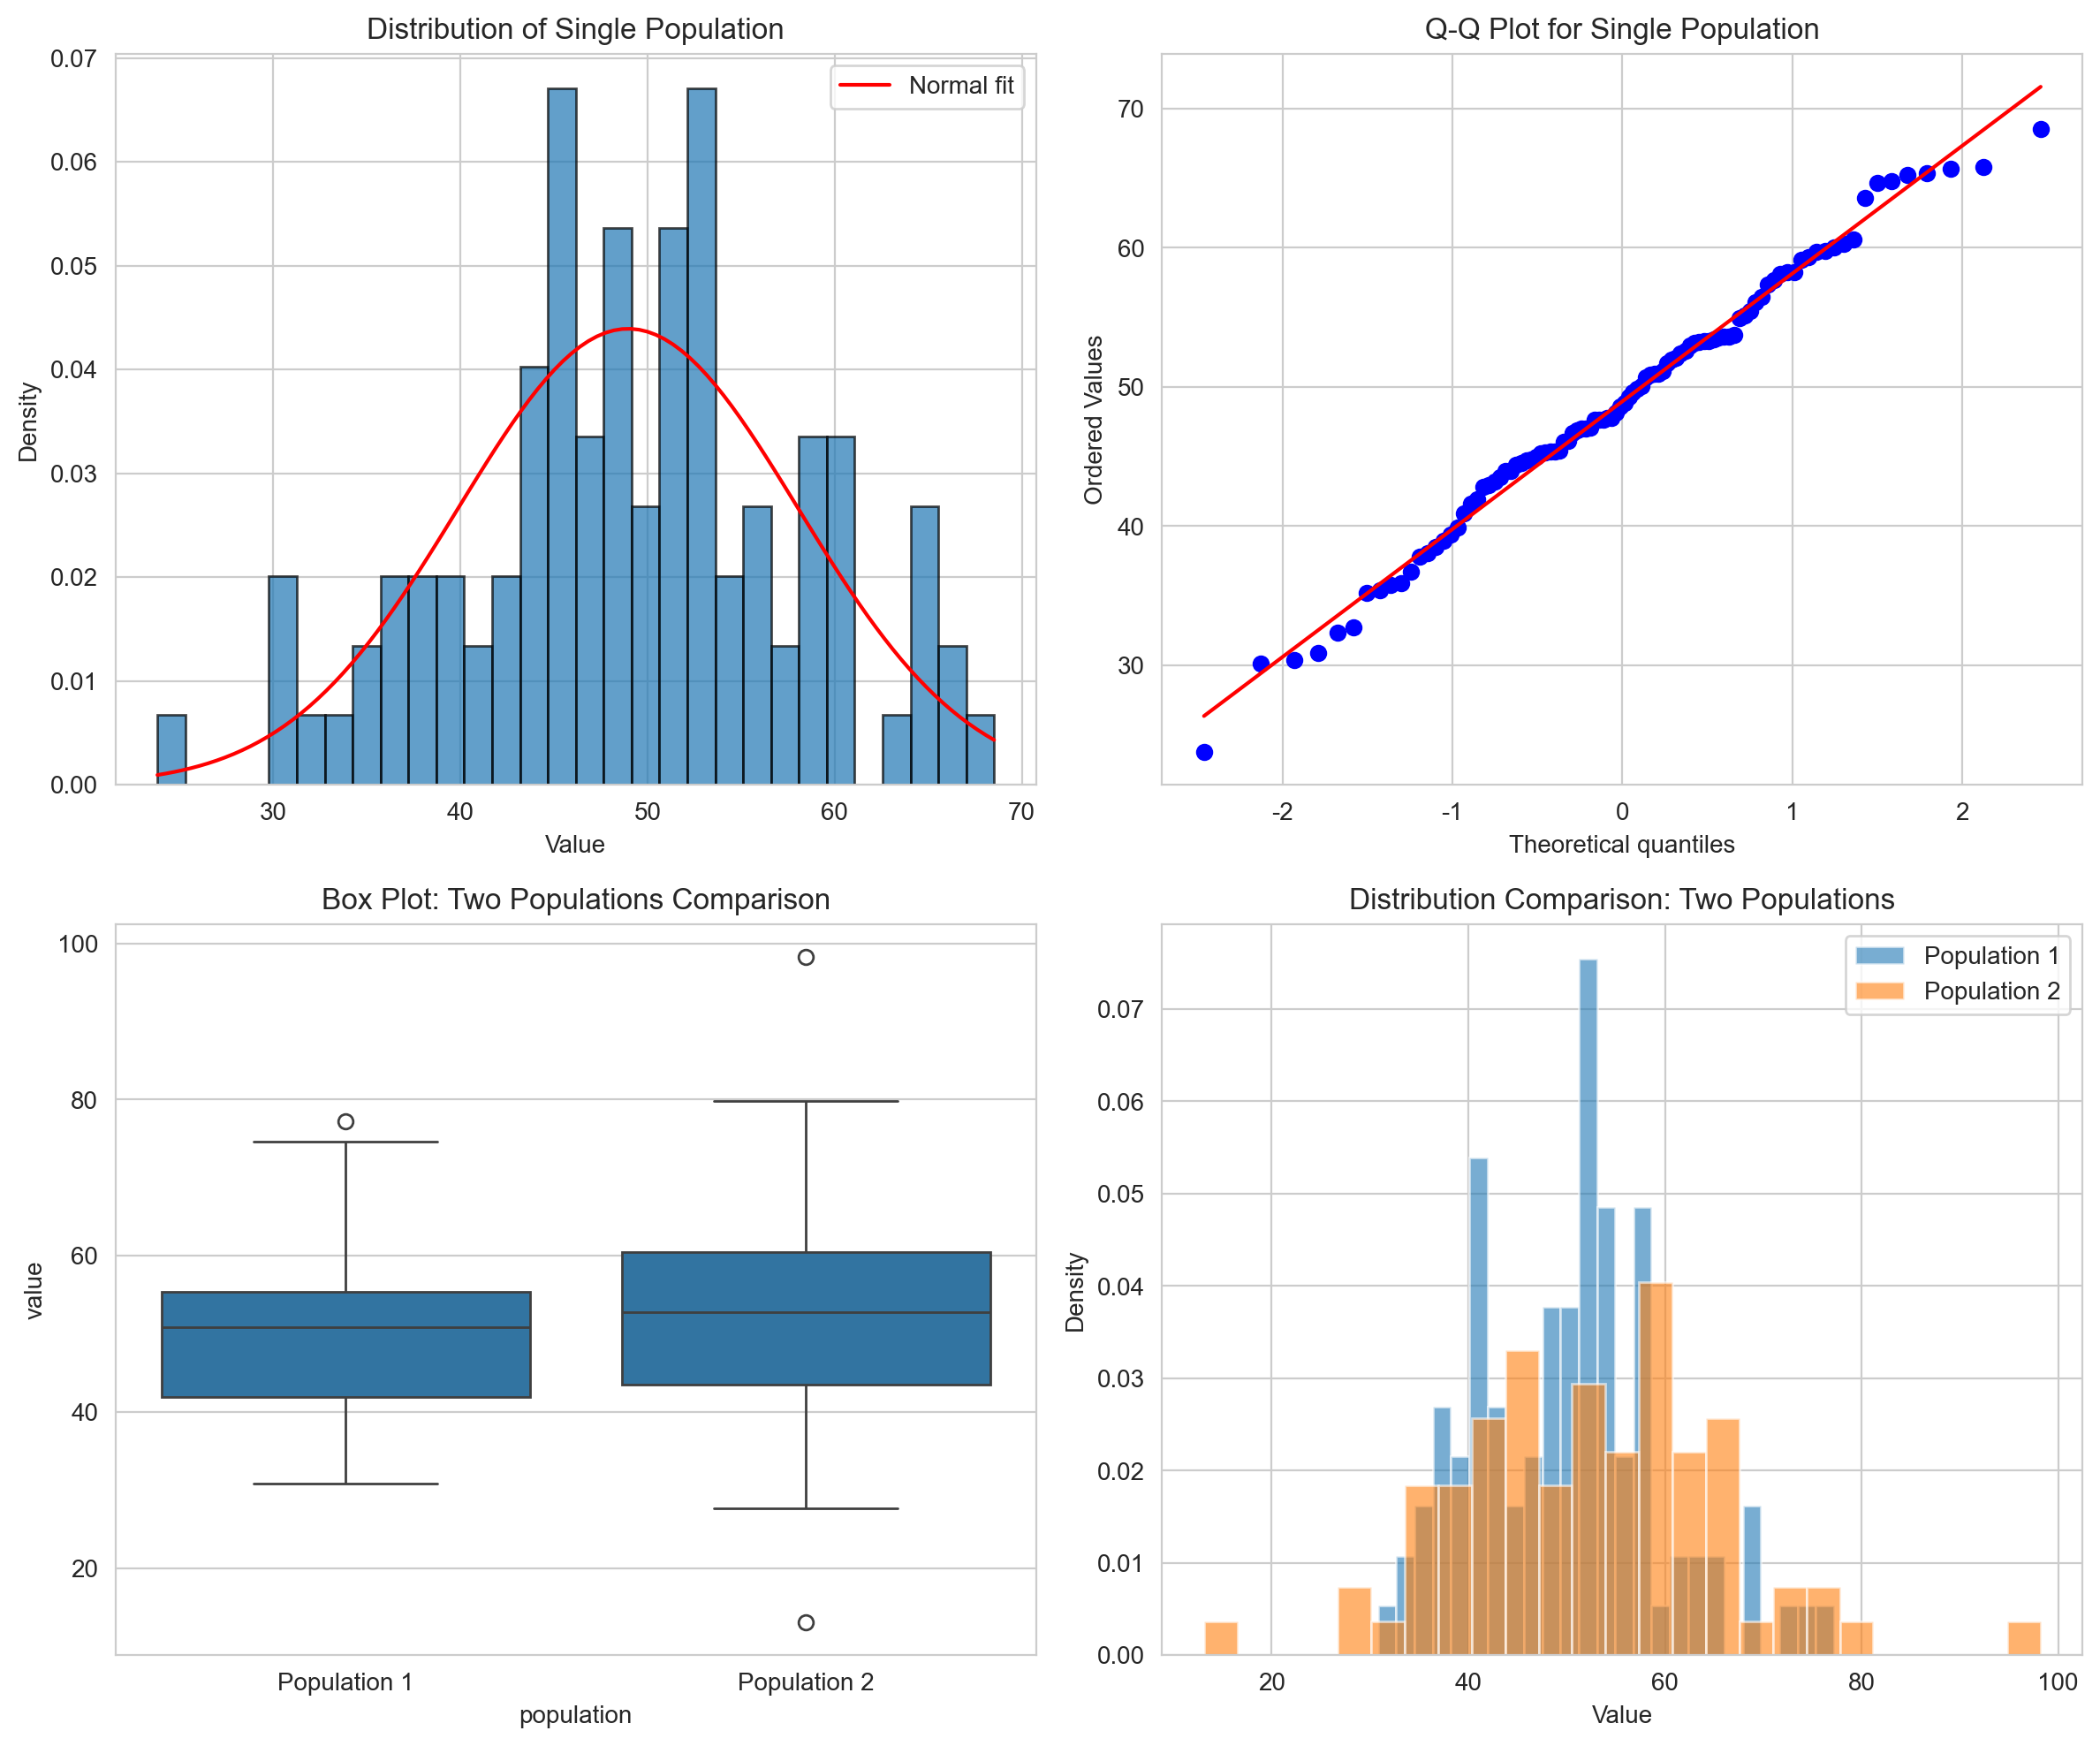


Shapiro-Wilk Normality Tests:
Single Population: Statistic=0.9899, p-value=0.6552
Population 1: Statistic=0.9775, p-value=0.0853
Population 2: Statistic=0.9839, p-value=0.4116


In [4]:
# Exploratory Data Analysis
fig, axes = plt.subplots(2, 2)

# Distribution of single population
axes[0,0].hist(single_pop_data, bins=30, edgecolor='black', alpha=0.7, density=True)
axes[0,0].set_title('Distribution of Single Population')
axes[0,0].set_xlabel('Value')
axes[0,0].set_ylabel('Density')

# Overlay with normal curve
x = np.linspace(single_pop_data.min(), single_pop_data.max(), 100)
normal_curve = stats.norm.pdf(x, loc=single_pop_data.mean(), scale=single_pop_data.std(ddof=1))
axes[0,0].plot(x, normal_curve, 'r-', label='Normal fit')
axes[0,0].legend()

# Q-Q plot for normality test (single population)
stats.probplot(single_pop_data, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot for Single Population')

# Box plot comparing two populations
sns.boxplot(data=two_pop_df, x='population', y='value', ax=axes[1,0])
axes[1,0].set_title('Box Plot: Two Populations Comparison')

# Histograms for two populations
axes[1,1].hist(pop1_data, bins=25, alpha=0.6, label='Population 1', density=True)
axes[1,1].hist(pop2_data, bins=25, alpha=0.6, label='Population 2', density=True)
axes[1,1].set_title('Distribution Comparison: Two Populations')
axes[1,1].set_xlabel('Value')
axes[1,1].set_ylabel('Density')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Normality tests
shapiro_stat1, shapiro_p1 = stats.shapiro(single_pop_data)
shapiro_stat2, shapiro_p2 = stats.shapiro(pop1_data)
shapiro_stat3, shapiro_p3 = stats.shapiro(pop2_data)

print(f"\nShapiro-Wilk Normality Tests:")
print(f"Single Population: Statistic={shapiro_stat1:.4f}, p-value={shapiro_p1:.4f}")
print(f"Population 1: Statistic={shapiro_stat2:.4f}, p-value={shapiro_p2:.4f}")
print(f"Population 2: Statistic={shapiro_stat3:.4f}, p-value={shapiro_p3:.4f}")

In [5]:
# Single Population Hypothesis Tests
print("=== SINGLE POPULATION HYPOTHESIS TESTS ===")

# Test 1: Single mean test (t-test)
hypothesized_mean = 48
t_stat, p_value = stats.ttest_1samp(single_pop_data, hypothesized_mean)

print(f"\n1. Single Mean Test (H₀: μ = {hypothesized_mean}, H₁: μ ≠ {hypothesized_mean})")
print(f"   t-statistic: {t_stat:.4f}")
print(f"   p-value: {p_value:.4f}")
print(f"   Sample mean: {single_pop_data.mean():.4f}")
print(f"   Decision (α=0.05): {'Reject H₀' if p_value < 0.05 else 'Fail to reject H₀'}")

# Test 2: Single variance test (Chi-square test)
hypothesized_var = 100
n = len(single_pop_data)
sample_var = np.var(single_pop_data, ddof=1)
chi2_stat = (n - 1) * sample_var / hypothesized_var
p_value_var = 1 - stats.chi2.cdf(chi2_stat, df=n-1)  # For right-tailed test

print(f"\n2. Single Variance Test (H₀: σ² = {hypothesized_var}, H₁: σ² ≠ {hypothesized_var})")
print(f"   Chi-square statistic: {chi2_stat:.4f}")
print(f"   p-value: {p_value_var:.4f}")
print(f"   Sample variance: {sample_var:.4f}")
print(f"   Decision (α=0.05): {'Reject H₀' if p_value_var < 0.05 else 'Fail to reject H₀'}")

=== SINGLE POPULATION HYPOTHESIS TESTS ===

1. Single Mean Test (H₀: μ = 48, H₁: μ ≠ 48)
   t-statistic: 1.0588
   p-value: 0.2923
   Sample mean: 48.9615
   Decision (α=0.05): Fail to reject H₀

2. Single Variance Test (H₀: σ² = 100, H₁: σ² ≠ 100)
   Chi-square statistic: 81.6522
   p-value: 0.8971
   Sample variance: 82.4770
   Decision (α=0.05): Fail to reject H₀


In [6]:
# Two Population Hypothesis Tests
print("=== TWO POPULATION HYPOTHESIS TESTS ===")

# Test 1: Two means test (independent samples, equal variances assumed)
t_stat_ind, p_value_ind = stats.ttest_ind(pop1_data, pop2_data, equal_var=True)

print(f"\n1. Two Means Test (Equal Variances Assumed)")
print(f"   H₀: μ₁ = μ₂, H₁: μ₁ ≠ μ₂")
print(f"   t-statistic: {t_stat_ind:.4f}")
print(f"   p-value: {p_value_ind:.4f}")
print(f"   Population 1 mean: {pop1_data.mean():.4f}")
print(f"   Population 2 mean: {pop2_data.mean():.4f}")
print(f"   Decision (α=0.05): {'Reject H₀' if p_value_ind < 0.05 else 'Fail to reject H₀'}")

# Test 2: Two means test (independent samples, unequal variances assumed - Welch's t-test)
t_stat_welch, p_value_welch = stats.ttest_ind(pop1_data, pop2_data, equal_var=False)

print(f"\n2. Two Means Test (Unequal Variances Assumed - Welch's t-test)")
print(f"   H₀: μ₁ = μ₂, H₁: μ₁ ≠ μ₂")
print(f"   t-statistic: {t_stat_welch:.4f}")
print(f"   p-value: {p_value_welch:.4f}")
print(f"   Decision (α=0.05): {'Reject H₀' if p_value_welch < 0.05 else 'Fail to reject H₀'}")

# Test 3: Two variances test (F-test)
var1 = np.var(pop1_data, ddof=1)
var2 = np.var(pop2_data, ddof=1)
f_stat = var1 / var2 if var1 > var2 else var2 / var1  # Larger variance in numerator
df1 = len(pop1_data) - 1
df2 = len(pop2_data) - 1
p_value_f = 2 * (1 - stats.f.cdf(f_stat, df1, df2))  # Two-tailed test

print(f"\n3. Two Variances Test (F-test)")
print(f"   H₀: σ₁² = σ₂², H₁: σ₁² ≠ σ₂²")
print(f"   F-statistic: {f_stat:.4f}")
print(f"   p-value: {p_value_f:.4f}")
print(f"   Population 1 variance: {var1:.4f}")
print(f"   Population 2 variance: {var2:.4f}")
print(f"   Decision (α=0.05): {'Reject H₀' if p_value_f < 0.05 else 'Fail to reject H₀'}")

# Levene's test for equality of variances (more robust to non-normality)
levene_stat, levene_p = stats.levene(pop1_data, pop2_data)

print(f"\n4. Levene's Test for Equality of Variances")
print(f"   H₀: σ₁² = σ₂², H₁: σ₁² ≠ σ₂²")
print(f"   Levene's statistic: {levene_stat:.4f}")
print(f"   p-value: {levene_p:.4f}")
print(f"   Decision (α=0.05): {'Reject H₀' if levene_p < 0.05 else 'Fail to reject H₀'}")

=== TWO POPULATION HYPOTHESIS TESTS ===

1. Two Means Test (Equal Variances Assumed)
   H₀: μ₁ = μ₂, H₁: μ₁ ≠ μ₂
   t-statistic: -1.3175
   p-value: 0.1894
   Population 1 mean: 50.2230
   Population 2 mean: 52.4826
   Decision (α=0.05): Fail to reject H₀

2. Two Means Test (Unequal Variances Assumed - Welch's t-test)
   H₀: μ₁ = μ₂, H₁: μ₁ ≠ μ₂
   t-statistic: -1.2698
   p-value: 0.2063
   Decision (α=0.05): Fail to reject H₀

3. Two Variances Test (F-test)
   H₀: σ₁² = σ₂², H₁: σ₁² ≠ σ₂²
   F-statistic: 1.9854
   p-value: 0.0018
   Population 1 variance: 90.9484
   Population 2 variance: 180.5719
   Decision (α=0.05): Reject H₀

4. Levene's Test for Equality of Variances
   H₀: σ₁² = σ₂², H₁: σ₁² ≠ σ₂²
   Levene's statistic: 7.9309
   p-value: 0.0054
   Decision (α=0.05): Reject H₀


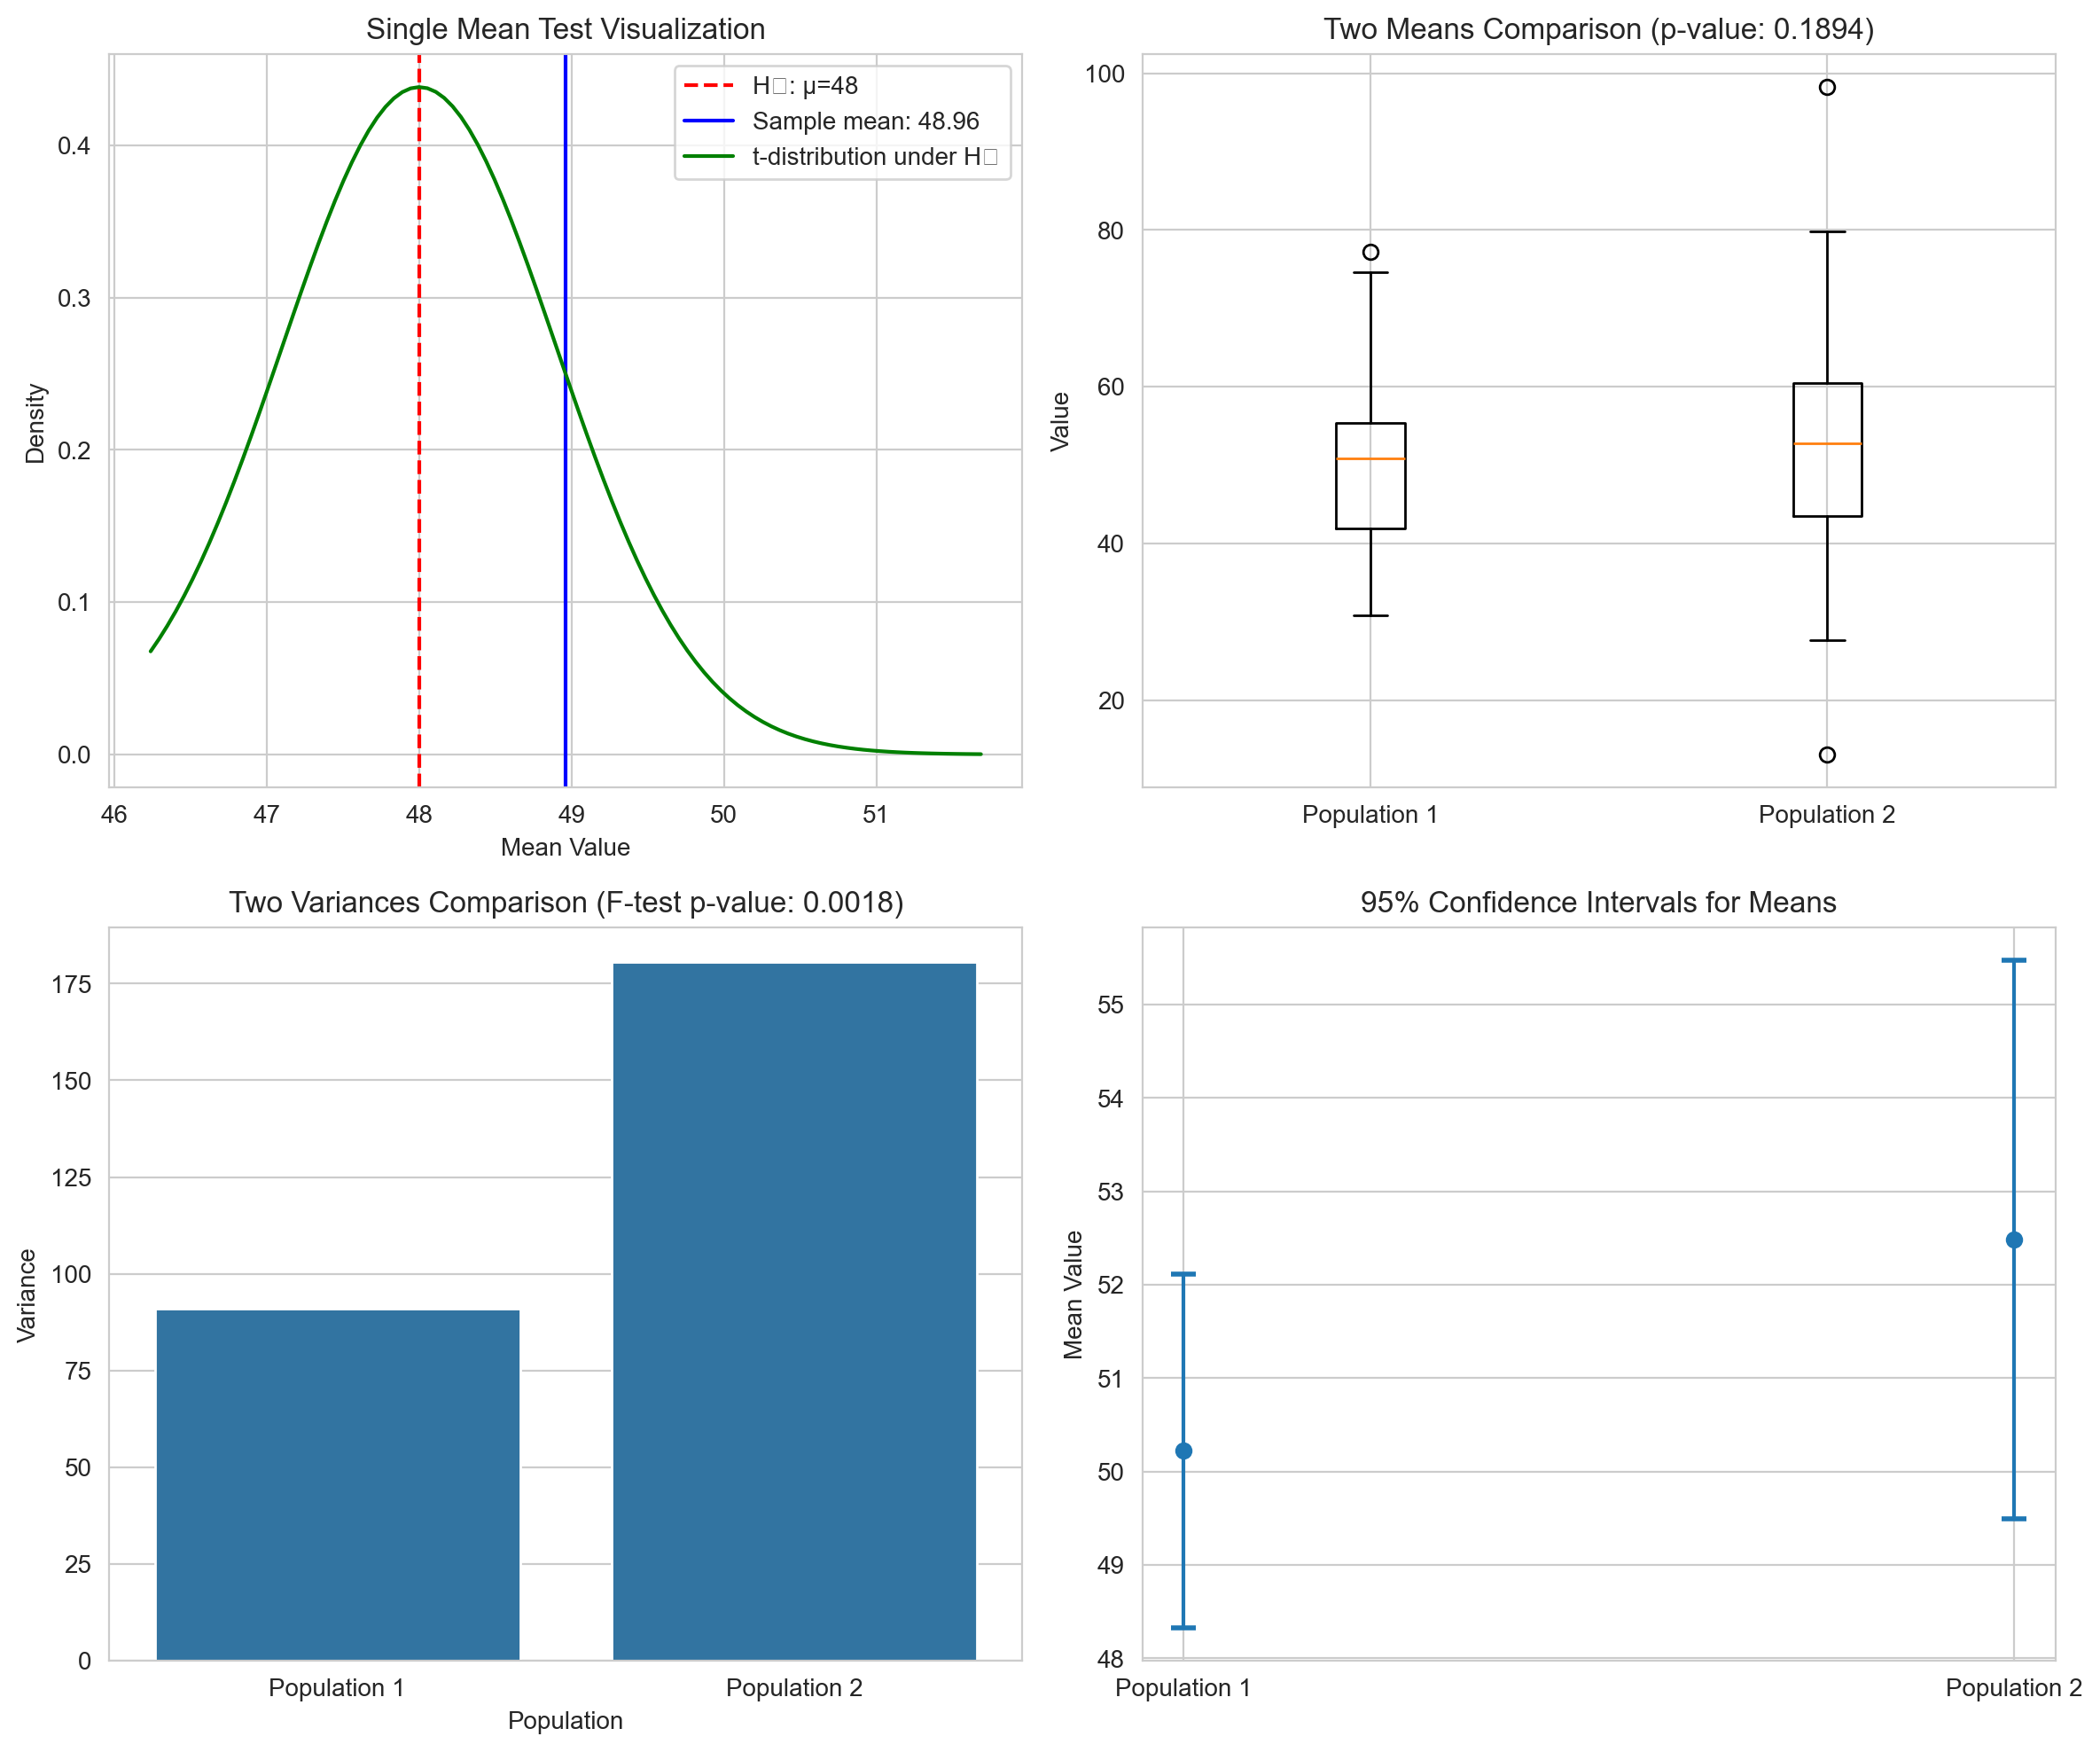


=== SUMMARY OF ALL HYPOTHESIS TESTS ===
Single Mean Test (vs 48): p-value = 0.2923
Single Variance Test (vs 100): p-value = 0.8971
Two Means Test (Equal Variances): p-value = 0.1894
Two Means Test (Welch's t-test): p-value = 0.2063
Two Variances Test (F-test): p-value = 0.0018
Levene's Test for Variances: p-value = 0.0054


In [7]:
# Visualization of hypothesis test results
fig, axes = plt.subplots(2, 2)

# Visualization of single mean test
x = np.linspace(single_pop_data.mean() - 3*single_pop_data.std(ddof=1)/np.sqrt(len(single_pop_data)),
                single_pop_data.mean() + 3*single_pop_data.std(ddof=1)/np.sqrt(len(single_pop_data)), 100)
t_dist = stats.t.pdf(x, df=len(single_pop_data)-1,
                     loc=hypothesized_mean,
                     scale=single_pop_data.std(ddof=1)/np.sqrt(len(single_pop_data)))

axes[0,0].axvline(hypothesized_mean, color='red', linestyle='--', label=f'H₀: μ={hypothesized_mean}')
axes[0,0].axvline(single_pop_data.mean(), color='blue', linestyle='-', label=f'Sample mean: {single_pop_data.mean():.2f}')
axes[0,0].plot(x, t_dist, 'g-', label='t-distribution under H₀')
axes[0,0].set_title('Single Mean Test Visualization')
axes[0,0].set_xlabel('Mean Value')
axes[0,0].set_ylabel('Density')
axes[0,0].legend()

# Visualization of two means comparison
axes[0,1].boxplot([pop1_data, pop2_data], labels=['Population 1', 'Population 2'])
axes[0,1].set_title(f'Two Means Comparison (p-value: {p_value_ind:.4f})')
axes[0,1].set_ylabel('Value')

# Visualization of variance comparison
var_comparison_df = pd.DataFrame({
    'Population': ['Population 1', 'Population 2'],
    'Variance': [var1, var2]
})
sns.barplot(data=var_comparison_df, x='Population', y='Variance', ax=axes[1,0])
axes[1,0].set_title(f'Two Variances Comparison (F-test p-value: {p_value_f:.4f})')
axes[1,0].set_ylabel('Variance')

# Confidence intervals for means
pop1_mean = pop1_data.mean()
pop2_mean = pop2_data.mean()
pop1_se = pop1_data.std(ddof=1) / np.sqrt(len(pop1_data))
pop2_se = pop2_data.std(ddof=1) / np.sqrt(len(pop2_data))

pop1_ci_lower = pop1_mean - stats.t.ppf(0.975, len(pop1_data)-1) * pop1_se
pop1_ci_upper = pop1_mean + stats.t.ppf(0.975, len(pop1_data)-1) * pop1_se

pop2_ci_lower = pop2_mean - stats.t.ppf(0.975, len(pop2_data)-1) * pop2_se
pop2_ci_upper = pop2_mean + stats.t.ppf(0.975, len(pop2_data)-1) * pop2_se

axes[1,1].errorbar([1, 2], [pop1_mean, pop2_mean],
                   yerr=[[pop1_mean-pop1_ci_lower, pop2_mean-pop2_ci_lower],
                         [pop1_ci_upper-pop1_mean, pop2_ci_upper-pop2_mean]],
                   fmt='o', capsize=5, capthick=2)
axes[1,1].set_xticks([1, 2])
axes[1,1].set_xticklabels(['Population 1', 'Population 2'])
axes[1,1].set_ylabel('Mean Value')
axes[1,1].set_title('95% Confidence Intervals for Means')
axes[1,1].grid(True, axis='y')

plt.tight_layout()
plt.show()

# Print summary of all tests
print("\n=== SUMMARY OF ALL HYPOTHESIS TESTS ===")
print(f"Single Mean Test (vs {hypothesized_mean}): p-value = {p_value:.4f}")
print(f"Single Variance Test (vs {hypothesized_var}): p-value = {p_value_var:.4f}")
print(f"Two Means Test (Equal Variances): p-value = {p_value_ind:.4f}")
print(f"Two Means Test (Welch's t-test): p-value = {p_value_welch:.4f}")
print(f"Two Variances Test (F-test): p-value = {p_value_f:.4f}")
print(f"Levene's Test for Variances: p-value = {levene_p:.4f}")

In [8]:
# Power analysis and effect size calculations
print("=== POWER ANALYSIS AND EFFECT SIZE ===")

# Effect size for two means (Cohen's d)
pooled_std = np.sqrt(((len(pop1_data)-1)*var1 + (len(pop2_data)-1)*var2) / (len(pop1_data) + len(pop2_data) - 2))
cohens_d = (pop1_mean - pop2_mean) / pooled_std
print(f"\nEffect Size (Cohen's d): {cohens_d:.4f}")
print(f"Interpretation: {('Large' if abs(cohens_d) >= 0.8 else 'Medium' if abs(cohens_d) >= 0.5 else 'Small') if abs(cohens_d) > 0.2 else 'Negligible'} effect")

# Effect size for two variances (Cohen's f²)
cohens_f_squared = (var1/var2 - 1)**2 if var1 > var2 else (var2/var1 - 1)**2
print(f"Effect Size for Variances (Cohen's f²): {cohens_f_squared:.4f}")

# Calculate power for the two-sample t-test
from scipy.stats import t
alpha = 0.05
df = len(pop1_data) + len(pop2_data) - 2
t_critical = t.ppf(1 - alpha/2, df)
power = 1 - t.cdf(t_critical - abs(cohens_d) * np.sqrt(len(pop1_data) * len(pop2_data) / (len(pop1_data) + len(pop2_data))), df) - \
        t.cdf(-t_critical - abs(cohens_d) * np.sqrt(len(pop1_data) * len(pop2_data) / (len(pop1_data) + len(pop2_data))), df)

print(f"Estimated Power: {power:.4f}")
print(f"Power interpretation: {'Adequate (>0.8)' if power > 0.8 else 'Inadequate (<0.8)'}")

=== POWER ANALYSIS AND EFFECT SIZE ===

Effect Size (Cohen's d): -0.1976
Interpretation: Negligible effect
Effect Size for Variances (Cohen's f²): 0.9711
Estimated Power: 0.2558
Power interpretation: Inadequate (<0.8)
